# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [16]:
!pip install --upgrade gensim scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.8 kB 325.1 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 326.8 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 358.4 kB/s eta 0:00:00
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.0 MB 495.5 kB/s eta 0:00:49
   ---------------------------------------- 0.1/24.0 MB 845.5 kB/s eta 0:00:29
   ---------------------------------------- 0.1/24.0 MB 853.3 kB/s eta 0:00:28
   ---------------------------------------- 0.2/24.0 MB 930.9 kB/s eta 0:00:26
   ---------------------------------------- 0.3/24.0 MB 1.1 MB/s eta 0:00:23
   -------

In [21]:
!pip install cython
%pip uninstall gensim -y
%pip install gensim

Found existing installation: gensim 4.3.3Note: you may need to restart the kernel to use updated packages.

Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3


You can safely remove it manually.



  Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl.metadata (8.2 kB)
Using cached gensim-4.3.3-cp312-cp312-win_amd64.whl (24.0 MB)


In [12]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   ---- ---------------------------------- 71.7/626.3 kB 280.5 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/626.3 kB 327.7 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/626.3 kB 425.3 kB/s eta 0:00:02
   --------- ---------------------------- 153.6/626.3 kB 437.1 kB/s eta 0:00:02
   ------------ ------------------------- 204.8/626.3 kB 479.2 kB/s eta 0:00:01
   ---------------- --------------------- 276.5/626.3 kB 587.7 kB/s eta 0:00:01
   -------------------- ----------------- 337.9/626.3 kB 635.0 kB/s eta 0:00:01
   ----------------------- -------------- 389.1/626.3 kB 692.6 kB/s eta 0:00:01
 

In [15]:
!pip install WordCloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/301.4 kB 1.3 MB/s eta 0:00:01
   ----------- --------------------------- 92.2/301.4 kB 871.5 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/301.4 kB 726.2 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.4 kB 871.5 kB/s eta 0:00:01
   ------------------------------ ------- 245.8/301.4 kB 942.1 kB/s eta 0:00:01
   ---------------------------------- --- 276.5/301.4 kB 944.1 kB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 846.4 kB/s eta 0:00:00


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | You may never see your ref...
1,Not Verified | Cargo service: that's how I fel...
2,✅ Trip Verified | Inefficient and slow airport...
3,Not Verified | The customer service is one of...
4,"Not Verified | Before my flight, I was forced ..."


In [5]:
df

,reviews
0,✅ Trip Verified | You may never see your ref...
1,Not Verified | Cargo service: that's how I fel...
2,✅ Trip Verified | Inefficient and slow airport...
3,Not Verified | The customer service is one of...
4,"Not Verified | Before my flight, I was forced ..."
...,...
995,✅ Trip Verified | Amsterdam to London on 15th...
996,✅ Trip Verified | Istanbul to London. My firs...
997,✅ Trip Verified | I had some difficulty from ...
998,✅ Trip Verified | London to Dusseldorf. No fr...


In [4]:
def remove_first_three_words(text):
    # Split the text into words and join all but the first three
    return ' '.join(text.split()[3:])
df['reviews'] = df['reviews'].apply(remove_first_three_words)

In [6]:
df

,reviews
0,| You may never see your refund. I cancelled m...
1,Cargo service: that's how I felt in the A380 u...
2,| Inefficient and slow airport operation. Rest...
3,The customer service is one of the worst I hav...
4,"Before my flight, I was forced by the ground s..."
...,...
995,| Amsterdam to London on 15th April. I arrived...
996,| Istanbul to London. My first flight in Econo...
997,"| I had some difficulty from the start, after ..."
998,| London to Dusseldorf. No free drinks or food...


In [8]:
df.to_csv('cleaned_dataset.csv', index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [9]:
print(df.isnull().sum())

reviews    0
dtype: int64


In [10]:
print(df.duplicated().sum())

0


In [5]:
df['reviews'] = df['reviews'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [6]:
df

,reviews
0,you may never see your refund i cancelled my ...
1,cargo service thats how i felt in the a380 upp...
2,inefficient and slow airport operation restin...
3,the customer service is one of the worst i hav...
4,before my flight i was forced by the ground st...
...,...
995,amsterdam to london on 15th april i arrived 3...
996,istanbul to london my first flight in economy...
997,i had some difficulty from the start after my...
998,london to dusseldorf no free drinks or food w...


In [7]:
from gensim import corpora
from gensim.models import LdaModel

# Prepare data for topic modeling
texts = [review.split() for review in df['reviews']]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


In [13]:
from textblob import TextBlob

# Function to calculate sentiment
def get_sentiment(review):
    return TextBlob(review).sentiment.polarity

# Apply sentiment analysis
df['sentiment'] = df['reviews'].apply(get_sentiment)

In [14]:
df

,reviews,sentiment
0,you may never see your refund i cancelled my ...,-0.066667
1,cargo service thats how i felt in the a380 upp...,0.088492
2,inefficient and slow airport operation restin...,-0.111719
3,the customer service is one of the worst i hav...,0.015097
4,before my flight i was forced by the ground st...,-0.143357
...,...,...
995,amsterdam to london on 15th april i arrived 3...,0.200000
996,istanbul to london my first flight in economy...,0.087727
997,i had some difficulty from the start after my...,0.130026
998,london to dusseldorf no free drinks or food w...,0.111111


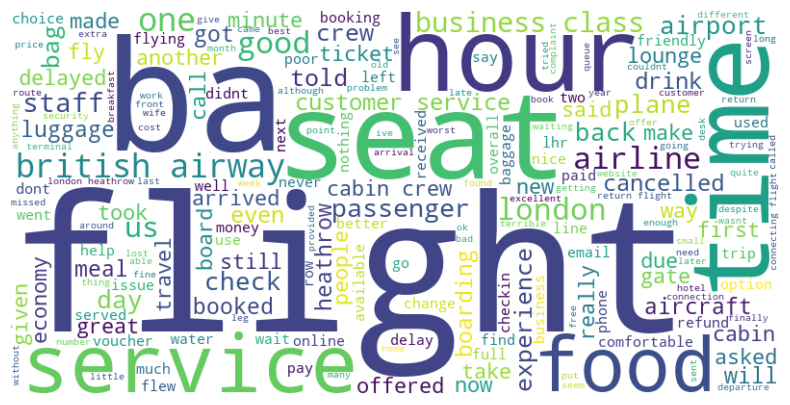

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['reviews']))
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

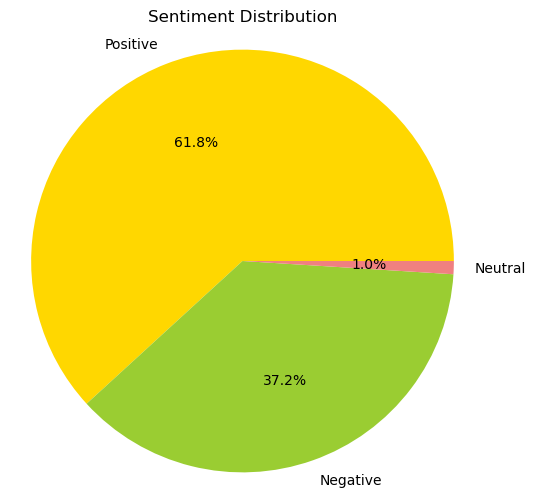

In [18]:
sentiment_scores = df['sentiment']

# Count positive, negative, and neutral reviews
pos_count = (sentiment_scores > 0).sum()
neg_count = (sentiment_scores < 0).sum()
neu_count = (sentiment_scores == 0).sum()

# Create sentiment distribution graph
labels = ['Positive', 'Negative', 'Neutral']
sizes = [pos_count, neg_count, neu_count]
colors = ['gold', 'yellowgreen', 'lightcoral']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Sentiment Distribution')
plt.show()

